# (In)Direct from the Source - Starter Notebook

Que bom que você começou este desafio! Este caderno contém mais informações sobre o desafio e descreve os passos que você pode seguir para resolvê-lo.

Este caderno está dividido em diferentes etapas:

1. Informações Gerais
2. Inspecionando os Dados
3. Limpando os Dados
4. Construindo e Testando um Modelo
5. Conclusão

## 1. Informações básicas

### Contexto Geológico

![](Pluto-cross-section.png)


A Bacia de Plutão é uma margem continental típica. Existem três megassequências principais, cada uma com rochas geradoras potenciais:
1. Bacia de Antepaís Paleozoica - o petróleo desta sequência 1 é classificado como uma rocha geradora de querogênio do `Type 1 Ordovician`.
2. Rift - O rifteamento ocorreu em duas fases: 2a e 2b. Poucos poços perfuraram esta seção, portanto a presença de rocha geradora é desconhecida. No entanto, a bacia conjugada a Plutão (ou seja, a bacia correspondente do outro lado do oceano) possui uma rocha geradora de querogênio do `Type I Lacustrine`.
3. Margem Passiva - A fase de margem passiva possui duas rochas geradoras potenciais. A base desta megassequência coincide com um evento de anoxia global que gerou uma rocha geradora de querogênio do `Type II Marine`. Além disso, a sequência contém numerosos intervalos ricos em carvão que podem ser rochas geradoras do `Type III Deltaic`.


O texto acima é um pouco de diversão geológica. O ponto principal é que existem quatro famílias diferentes de petróleo na bacia que você precisa identificar. Se você quiser aprender mais sobre rochas geradoras, tipos de querogênio e geração de petróleo, aqui está um bom ponto de partida.

https://wiki.aapg.org/Petroleum_source_rocks


### Notas do Geoquímico
O último geoquímico a trabalhar na Bacia de Plutão forneceu algumas informações úteis para você começar.

* Um modelo de bacia para a Bacia de Plutão nos mostrou onde estão as zonas geradoras de petróleo para as rochas-fonte lacustres e marinhas. Uma zona geradora de petróleo é uma área onde a rocha-fonte está presente e dentro da janela de geração de petróleo. Há uma lacuna central na zona geradora lacustre porque a rocha-fonte está profundamente enterrada nessa região e provavelmente já atingiu a maturidade para geração de gás. Este mapa será útil para você avaliar a precisão do seu modelo.
* Presume-se que a migração do petróleo na bacia seja vertical, saindo da área de influência. No entanto, alguns vales encaixados na porção nordeste da bacia (setas pretas no mapa da área de influência) podem fazer com que o petróleo migre para montante.
* Ao longo das décadas, três laboratórios diferentes processaram amostras de petróleo da Bacia de Plutão (ver coluna Lab). Cada laboratório tinha padrões ligeiramente diferentes, portanto a escala é diferente para cada um. O que importa é o formato do cromatograma, não seu valor absoluto.
* Alguns erros comuns nos dados incluem valores anormalmente altos na variável 21 (contaminação por lama de perfuração à base de óleo) e erros na coleta de dados que aparecem zeros.

![](Pluto-kitchen-labels.png)
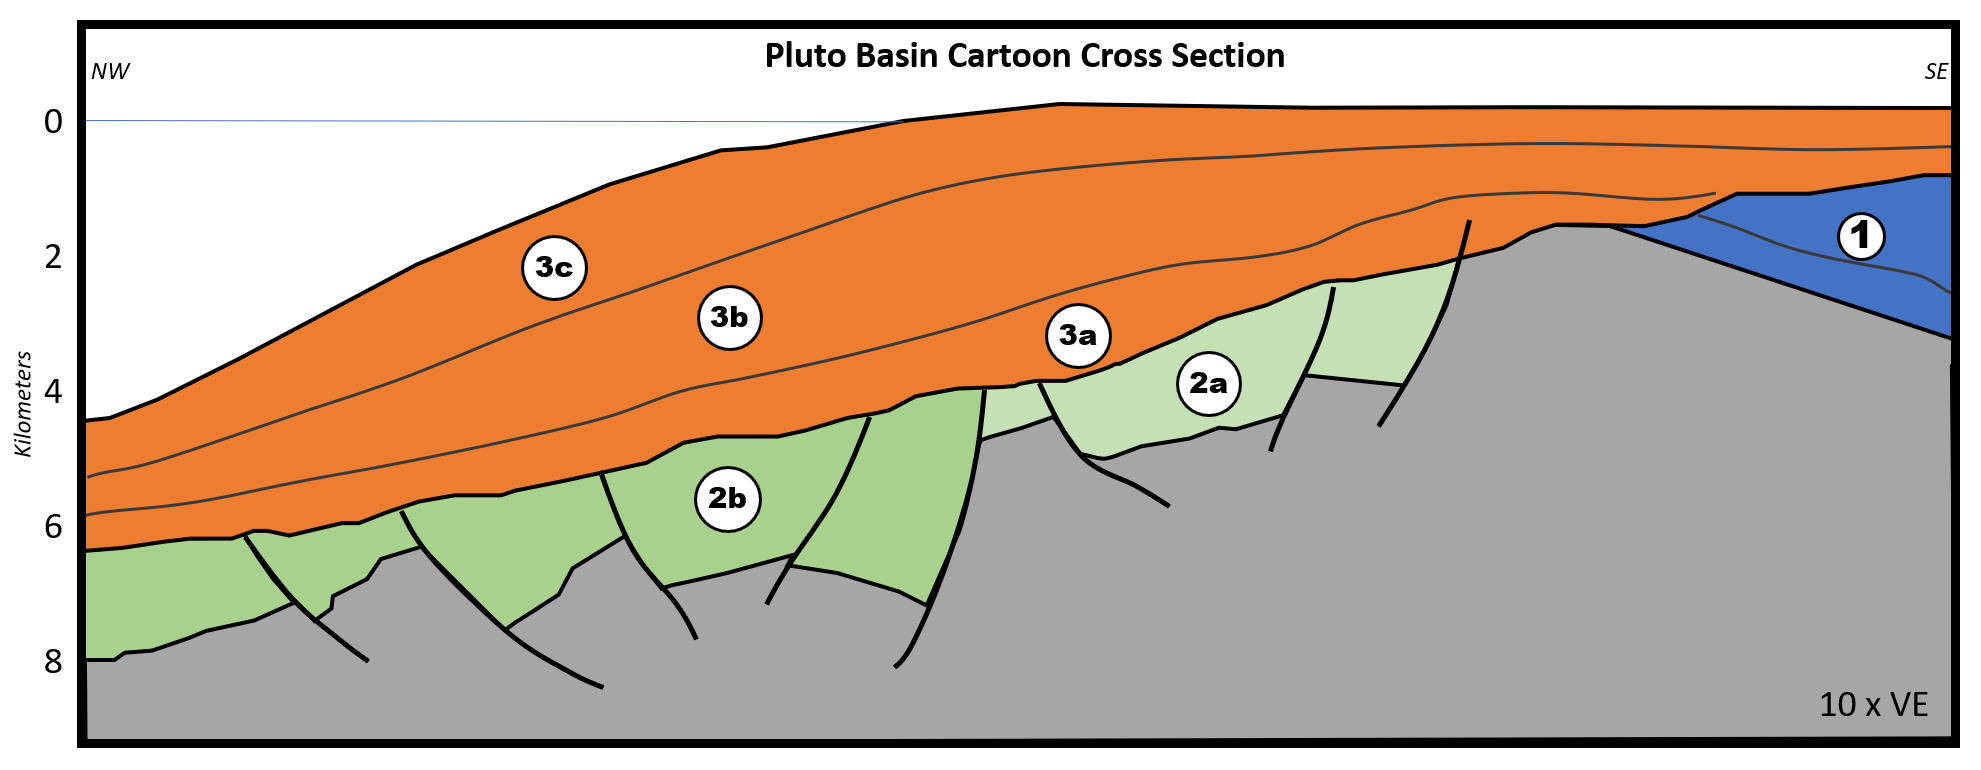

## 2. Inspecionar os dados
Vamos carregar os dados e ver o que temos.

In [1]:
# módulos de carga
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# carregar dados de amostra
df = pd.read_csv("InDirect_From_Source_Geochemistry_Samples.csv")

# quais são as colunas
df.columns

Index(['sample_id', 'Lab', 'y', 'x', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', 'OL', 'GA'],
      dtype='object')

Algumas informações sobre as colunas:

**sample_id:** Índice do dataframe. Preserve este índice, pois ele será usado para a pontuação.

**Lab:** Qual laboratório processou a amostra? Consulte a Nota do Geoquímico para entender por que essa coluna é importante.

**X, Y:** Localização da amostra no mapa.

**19 - GA:** Essas são as diferentes cadeias de hidrocarbonetos que compõem uma amostra. Essas são as principais variáveis ​​para este desafio.

In [3]:
# dê uma olhada rápida nas 5 primeiras linhas
df.head()

,sample_id,Lab,y,x,19,20,21,22,23,24,25,26,27,28,29,30,31,32,OL,GA
0,0,Lab_2,380,590,20.763486,13.947363,1.952259,16.486101,0.000000,4.700927,0.000000,22.170079,9.838302,0.000000,9.655032,4.117457,1.156801,25.926844,6.734488,4.471749
1,1,Lab_1,140,470,118.643361,130.716833,1152.234830,0.000000,0.000000,97.190520,183.275260,172.616987,74.513555,227.625892,85.241758,23.851172,0.000000,200.715642,75.290342,0.000000
2,2,Lab_1,350,440,123.998274,119.186570,0.000000,157.329488,9.416534,66.115133,116.153357,141.570068,0.000000,195.406313,51.625043,19.935382,57.203727,0.000000,42.262010,33.352354
3,3,Lab_2,790,160,13.753847,18.599869,1555.472651,9.205427,7.676030,23.369460,18.861401,0.000000,6.889721,18.959263,6.308057,8.018402,0.000000,18.181328,5.072130,15.635603
4,4,Lab_3,240,600,22.143712,20.548714,5.660628,21.590330,7.199149,16.221228,28.281983,24.309612,7.921879,31.266928,15.366561,6.013449,5.000000,25.824537,17.897014,7.305632


In [4]:
# quais são os intervalos das variáveis (19 - GA) que estamos definindo como alvo
# observe que cada variável tem pelo menos um 0 para preencher e que a variável 21 tem o maior desvio padrão
df.iloc[:, 2:].describe()

,y,x,19,20,21,22,23,24,25,26,27,28,29,30,31,32,OL,GA
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,400.250000,369.625000,53.995146,52.968057,287.763588,54.686017,13.374795,39.686747,70.218122,55.719074,30.570730,81.303271,31.744038,17.346608,33.190267,78.360287,28.098199,25.735842
std,226.184505,219.426432,64.575781,62.583759,575.647700,79.729861,27.541256,59.887212,86.898960,82.839628,41.420514,100.482545,39.134086,33.874675,57.960619,102.807647,44.964391,36.576167
min,20.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,197.500000,13.955240,13.947340,1.847332,12.323100,0.000000,7.514420,18.153328,5.369135,7.079891,19.858095,8.424155,0.000000,1.127810,18.661496,5.404262,5.885416
50%,375.000000,330.000000,19.717639,18.656664,19.773146,19.017512,4.496834,14.876283,24.385117,19.463490,11.279139,28.120272,12.274339,6.322978,9.323648,24.761190,11.412859,10.679740
75%,572.500000,552.500000,86.117004,84.275014,71.622264,58.213985,12.023862,32.364590,101.696603,61.247270,36.263517,135.197831,48.606449,16.581016,36.212735,95.262570,23.804677,32.555426
max,790.000000,790.000000,276.742729,204.535055,1963.937864,300.249803,142.603083,305.725491,294.231638,314.820700,210.388790,360.174141,163.308784,198.654188,280.562580,381.847757,223.921967,197.737442


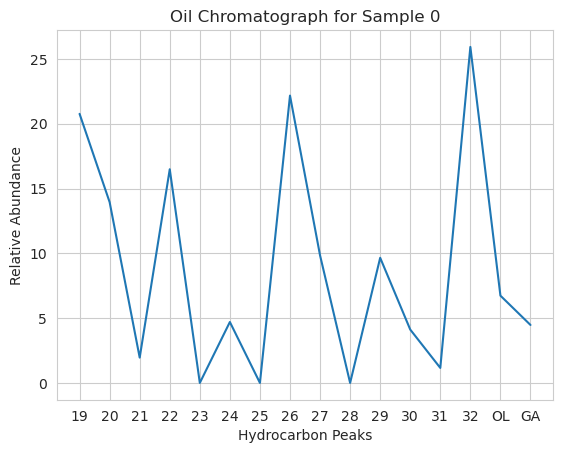

In [5]:
# Observe o cromatograma de uma amostra.
# Pode não significar muito para nós, mas para um geoquímico é a impressão digital da amostra.
fig = plt.figure()
plt.plot(df.iloc[0, 4:])
plt.title(f"Oil Chromatograph for Sample 0")
plt.ylabel("Relative Abundance")
plt.xlabel("Hydrocarbon Peaks")
plt.show()

Para obter mais informações sobre cromatógrafos, consulte:

https://wiki.aapg.org/Gas_chromatography:_data_obtained

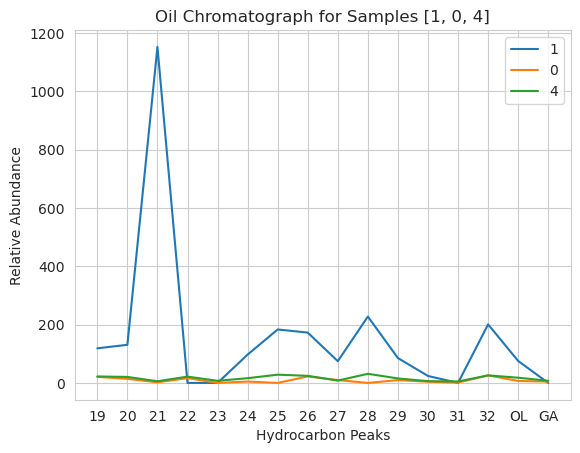

In [6]:
# analise três laboratórios diferentes a partir de amostras
sample_each_lab = [1, 0, 4]

fig = plt.figure()
for i in sample_each_lab:
    plt.plot(df.iloc[i, 4:])

plt.title(f"Oil Chromatograph for Samples {sample_each_lab}")
plt.ylabel("Relative Abundance")
plt.xlabel("Hydrocarbon Peaks")
plt.legend(sample_each_lab, loc="upper right")
plt.show()

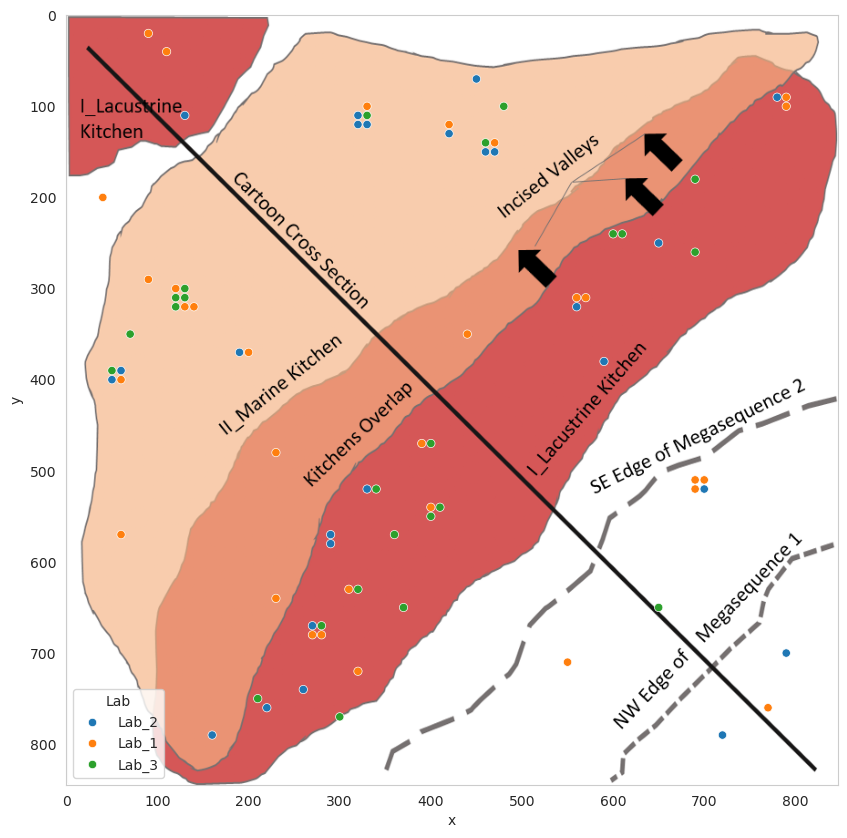

In [7]:
# coloque os dados no mapa
# carregar imagem do mapa
kitchens = mpimg.imread("Pluto-kitchen-labels.png")

# mostrar mapa
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(kitchens)

# adicione dados de amostra como um gráfico de dispersão sobre o mapa
ax = sns.scatterplot(x="x", y="y", hue="Lab", data=df)
ax.grid(False)
plt.show()

## 3. Limpar os dados

Antes de podermos trabalhar na previsão, precisamos limpar o conjunto de dados de amostra. Há três problemas que precisamos considerar:
1. Lidar com zeros.
2. Picos em 21.
3. Unificar valores de diferentes laboratórios.

#### 3.1. Lidando com zeros
Existem poucas opções para lidar com os dados faltantes, agora representados por zeros, em todo o conjunto de dados.
1. Remover as linhas com zeros.
2. Imputar um valor para os zeros.
3. Manter os zeros e continuar com o modelo para ver o quanto eles podem afetá-lo.

In [8]:
# excluir qualquer linha com zeros não é prático, pois destruiria o banco de dados (de 80 para 10 linhas).
df[df != 0].dropna().shape

(10, 20)

A imputação de valores pode ser feita usando o SimpleImputer do SciKit Learn. Imputar valores faz sentido para características sobre as quais você já tem algum conhecimento. Neste ponto do notebook, você tem conhecimento limitado sobre o intervalo em que uma determinada variável deve se enquadrar. No entanto, você tem algumas informações dos próprios dados (ou seja, o df.describe() acima) e na Seção 4 você aprenderá ainda mais.

Se você deseja imputar valores, a página de documentação do SimpleImputer é um ótimo ponto de partida:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

#### 3.2 Spikes aos 21
A contaminação da amostra é lamentável, mas pelo menos sabemos onde procurá-la, na variável 21. Existem algumas maneiras de lidar com esses picos:

1. Encontre amostras com picos e, em seguida, reduza ou remova-os.
2. Mantenha os picos e continue com o modelo para ver o quanto eles o afetam.

Primeiro, vamos analisar o que são esses picos.

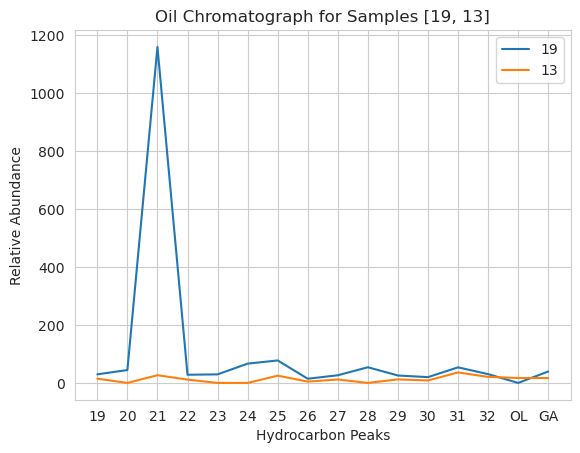

In [9]:
# compare duas amostras
spike_nospike = [19, 13]

fig = plt.figure()
for i in spike_nospike:
    plt.plot(df.iloc[i, 4:])

plt.title(f"Oil Chromatograph for Samples {spike_nospike}")
plt.ylabel("Relative Abundance")
plt.xlabel("Hydrocarbon Peaks")
plt.legend(spike_nospike, loc="upper right")
plt.show()

Utilizar o z-score (número de desvios padrão em relação à média) do módulo SciPy é um método para identificar quais amostras apresentam picos. O z-score deve ser calculado considerando todos os valores de uma amostra, visto que cada amostra possui uma escala diferente com base em seu laboratório de origem (próxima seção).

Ao utilizar o limite do z-score, é possível identificar quais amostras apresentam picos. Em seguida, você pode atribuir um valor imputado a esses picos ou simplesmente monitorar seu desempenho durante a predição.

In [10]:
# Identificação de picos usando a z-score
from scipy import stats

zscore_spike = stats.zscore(df.iloc[19, 4:].values.astype(np.float64))
zscore_no_spike = stats.zscore(df.iloc[13, 4:].values.astype(np.float64))

# imprimir resultados, indexando na 2ª posição para o array de z-score
print(f"Variable 21 z-score for sample with spike: {zscore_spike[2]}")
print(f"Variable 21 z-score for sample with no spike: {zscore_no_spike[2]}")

Variable 21 z-score for sample with spike: 3.8635611991191574
Variable 21 z-score for sample with no spike: 1.3230296044812868


#### 3.3 Escala laboratorial
Conforme mencionado na nota do geoquímico, três laboratórios diferentes analisaram essas amostras, cada um com padrões distintos. Isso significa que a escala das medições varia de acordo com a origem do laboratório.

A observação importante aqui é que o **formato da curva** permanece o mesmo, independentemente do laboratório que processou a amostra. Uma solução para preservar o formato da curva é usar funções de escala. A função `MinMaxScaler` do Scikit-learn é um bom ponto de partida.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

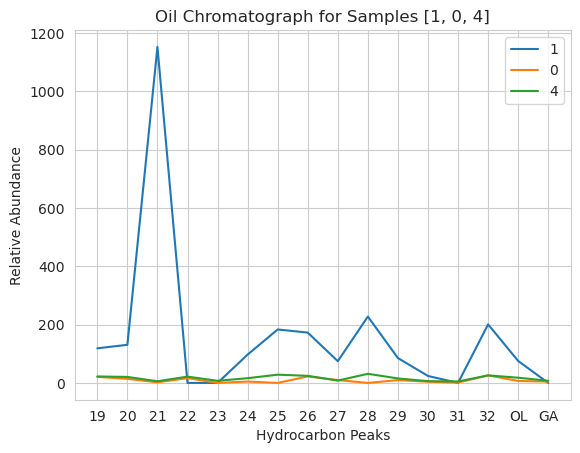

In [11]:
# exemplo de amostras dos três laboratórios

fig = plt.figure()
for i in sample_each_lab:
    plt.plot(df.iloc[i, 4:])

plt.title(f"Oil Chromatograph for Samples {sample_each_lab}")
plt.ylabel("Relative Abundance")
plt.xlabel("Hydrocarbon Peaks")
plt.legend(sample_each_lab, loc="upper right")
plt.show()

## 4. Construindo e testando um modelo preditivo

Agora temos todos os dados necessários para construir um modelo de aprendizado de máquina para prever os tipos de petróleo na Bacia de Plutão. Embora você possa escolher o algoritmo que preferir, a escala deste problema se adequa melhor aos modelos de conjunto do SciKit Learn.

Os passos para um modelo de conjunto simples:
1. Embaralhe os dados usando `sklearn.utils.shuffle`
2. Divida os dados de treinamento usando `sklearn.model_selection.train_test_split`
3. Crie um objeto classificador (por exemplo, `sklearn.ensemble.RandomForestClassifier`)
4. Treine o classificador com os dados de treinamento
5. Preveja o rótulo com os dados de teste
6. Gere a pontuação de acurácia usando `sklearn.metrics.accuracy_score`

Você deve executar este fluxo de trabalho duas vezes. Na primeira vez, use apenas os dados sintéticos para garantir que você tenha dados de treinamento suficientes para construir um modelo robusto. Na segunda vez, treine com os dados sintéticos e faça previsões com base nos dados de amostra da competição.

Se você quiser ver um exemplo prático, Matt Hall, da Agile Scientific, tem um ótimo post curto sobre esse fluxo de trabalho.

https://agilescientific.com/blog/2017/1/4/x-lines-of-python-machine-learning

## 5. Verificando sua resposta

Apesar de todo esse trabalho, a bacia... Os dados de entrada são confusos e recorremos a dados de treinamento sintéticos, o que traz consigo uma série de problemas. Felizmente, existe um método mais robusto do que qualquer coisa em Python: **seu cérebro geológico!**

Antes de enviar sua previsão, marque sua resposta no mapa da cozinha e pergunte a si mesmo:
1. As famílias correspondem às cozinhas ou segmentos corretos da bacia?
2. Existem características geológicas na bacia que o direcionam para uma família em detrimento de outra?
3. Como você acha que o petróleo está migrando dentro da bacia?

No fim das contas, trata-se da sua interpretação do subsolo, não da interpretação de uma máquina. 

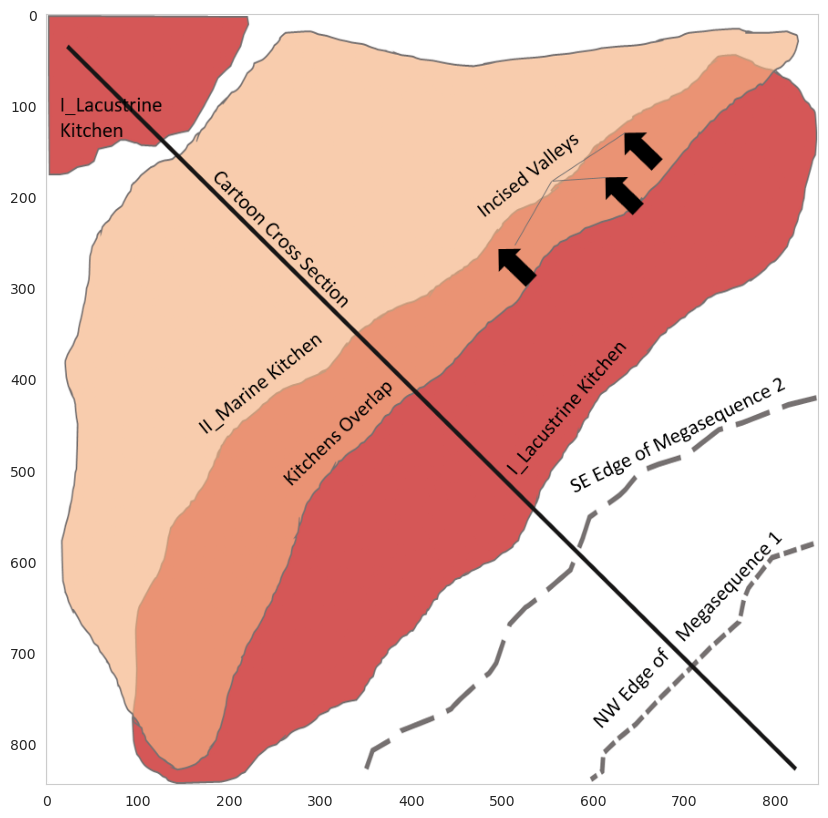

In [ ]:
# marque sua resposta no mapa.

basemap = kitchens
prediction = pd.DataFrame({"x": [], "y": [], "family": []})  # your predictions here

# mostrar basemap
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(basemap)

# scatter
ax = sns.scatterplot(x="x", y="y", hue="family", data=prediction)
ax.grid(False)
plt.show()

Quando estiver satisfeito com sua resposta, você poderá enviá-la para o ThinkOnward. Envie apenas a previsão referente à "família".  

**Note:** As amostras devem ter o mesmo índice que o arquivo CSV geoquímico original.

In [ ]:
# export format for testing on ThinkOnward
prediction[["sample_id", "family"]].to_csv(
    "contestant_submission_example.csv", index=False
)

Esperamos que você tenha tido uma experiência divertida e que possa usar algumas das habilidades aprendidas aqui em seus projetos futuros.

*ThinkOnward Team*